<a href="https://colab.research.google.com/github/iswaniswan/bmlp/blob/main/Submission_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyek Akhir : Klasifikasi Gambar

#kelas dicoding - Belajar Machine Learning untuk Pemula

Download resource file

In [2]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rock-paper-scissors.zip  


--2021-07-07 16:12:48--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock-paper-scissors.zip’

/tmp/rock-paper-sci 100%[===================>] 307.92M  9.43MB/s    in 35s     

2021-07-07 16:13:24 (8.82 MB/s) - ‘/tmp/rock-paper-scissors.zip’ saved [322873683/322873683]



Import library

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import zipfile, os
import numpy as np

Extract zip file and set resource directory

In [4]:
res_zip = '/tmp/rock-paper-scissors.zip'
zip_ref = zipfile.ZipFile(res_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

res_dir = '/tmp/rockpaperscissors/rps-cv-images'

Generate image data with agumentation, 
Define train & validation of 60:40 ratio

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=15, horizontal_flip=True,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
    fill_mode='nearest', validation_split=0.4
)

validation_datagen = ImageDataGenerator(
    rescale=1./255, validation_split=0.4
)

train_set = train_datagen.flow_from_directory(
    res_dir, target_size=(100, 150), batch_size=32, class_mode='categorical', subset='training'
)

validation_set = validation_datagen.flow_from_directory(
    res_dir, target_size=(100, 150), batch_size=32, class_mode='categorical', subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Build model architecture

In [17]:
model = Sequential([
     Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),
     MaxPooling2D(2, 2),
     Dropout(0.24),
     Conv2D(32, (3, 3), activation='relu'),
     MaxPooling2D(2, 2),
     Dropout(0.24),
     Conv2D(32, (3, 3), activation='relu'),
     MaxPooling2D(2, 2),
     Dropout(0.24),
     Flatten(),
     Dense(512, activation='relu'),
     Dropout(0.24),
     Dense(128, activation='relu'),
     Dropout(0.24),
     Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 49, 74, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 36, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 34, 32)       

Compile and train model then visualize result

Epoch 1/16
41/41 - 9s - loss: 0.3544 - accuracy: 0.8736 - val_loss: 0.2952 - val_accuracy: 0.9062
Epoch 2/16
41/41 - 8s - loss: 0.3305 - accuracy: 0.8869 - val_loss: 0.3281 - val_accuracy: 0.9023
Epoch 3/16
41/41 - 8s - loss: 0.3010 - accuracy: 0.8910 - val_loss: 0.2235 - val_accuracy: 0.9531
Epoch 4/16
41/41 - 8s - loss: 0.2973 - accuracy: 0.9103 - val_loss: 0.1695 - val_accuracy: 0.9570
Epoch 5/16
41/41 - 8s - loss: 0.2543 - accuracy: 0.9126 - val_loss: 0.1867 - val_accuracy: 0.9505
Epoch 6/16
41/41 - 8s - loss: 0.2252 - accuracy: 0.9212 - val_loss: 0.1367 - val_accuracy: 0.9661
Epoch 7/16
41/41 - 8s - loss: 0.2290 - accuracy: 0.9275 - val_loss: 0.1695 - val_accuracy: 0.9544
Epoch 8/16
41/41 - 8s - loss: 0.2196 - accuracy: 0.9259 - val_loss: 0.1108 - val_accuracy: 0.9688
Epoch 9/16
41/41 - 8s - loss: 0.2182 - accuracy: 0.9314 - val_loss: 0.1673 - val_accuracy: 0.9544
Epoch 10/16
41/41 - 8s - loss: 0.1944 - accuracy: 0.9345 - val_loss: 0.1156 - val_accuracy: 0.9740
Epoch 11/16
41/41 -

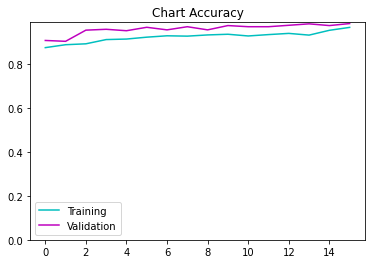

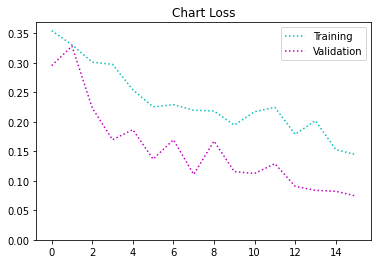

Found 874 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

        Rock       0.96      0.95      0.95       284
       Paper       0.99      0.97      0.98       290
    Scissors       0.96      0.99      0.97       300

    accuracy                           0.97       874
   macro avg       0.97      0.97      0.97       874
weighted avg       0.97      0.97      0.97       874



In [21]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', patience=3, verbose=1, factor=0.4, min_lr=0.000001
)

model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

history = model.fit(
    train_set, 
    steps_per_epoch=41, 
    epochs=16, 
    validation_data=validation_set,
    validation_steps=24,
    verbose=2,
    callbacks=[learning_rate_reduction]
)

plot_result(history.history)
evaluate(model)

Plot chart and evaluate function

In [8]:
def plot_result(history):   
    train_accuracy = history['accuracy']
    loss_train = history['loss']
    validation_accuracy = history['val_accuracy']
    loss_validation = history['val_loss']

    steps = range(len(train_accuracy))

    plt.plot(steps, train_accuracy, '-c', label='Training')
    plt.plot(steps, validation_accuracy, '-m', label='Validation')
    plt.title('Chart Accuracy')
    plt.legend(loc=0)
    plt.ylim(bottom=0)
    plt.show()

    plt.plot(steps, loss_train, ':c', label='Training')
    plt.plot(steps, loss_validation, ':m', label='Validation')
    plt.title('Chart Loss')
    plt.legend(loc=0)
    plt.ylim(bottom=0)
    plt.show()


def evaluate(model):
    samples = train_datagen.flow_from_directory(
          res_dir, target_size=(100,150), batch_size=32, class_mode='categorical', 
          shuffle = False, subset='validation'
    )
    samples_count = len(samples.filenames)
    _predictions = model.predict_generator(samples, samples_count // 32+1)
    predictions = np.argmax(_predictions, axis=1)

    report = classification_report(
        samples.classes, predictions, target_names=['Rock', 'Paper', 'Scissors']
    )
    print(report)


# Apps
Testing the model prediction

Saving test_scissors_01.png to test_scissors_01 (9).png
Saving test_scissors_02.png to test_scissors_02 (8).png
Saving test_scissors_03.png to test_scissors_03 (6).png
Saving test_scissors_04.png to test_scissors_04 (6).png
Saving test_rock_01.png to test_rock_01 (7).png
Saving test_rock_03.png to test_rock_03 (8).png
Saving test_rock_02.png to test_rock_02 (9).png
Saving test_paper_03.png to test_paper_03 (5).png
Saving test_paper_02.png to test_paper_02 (9).png
Saving test_paper_01.png to test_paper_01 (5).png
Prediction image is scissors
Prediction image is scissors
Prediction image is scissors
Prediction image is scissors
Prediction image is rock
Prediction image is rock
Prediction image is rock
Prediction image is paper
Prediction image is paper
Prediction image is paper


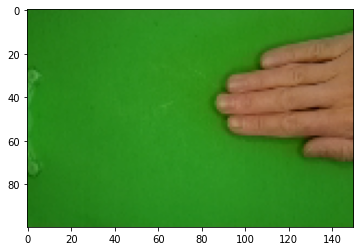

In [42]:
uploaded = files.upload()

_classes = {
    0:'paper', 1:'rock', 2:'scissors'
}

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)
    output_classes = np.argmax(classes)    
    result = [v for k, v in _classes.items() if k==output_classes]
    print('Prediction image is {}'.format(*result))